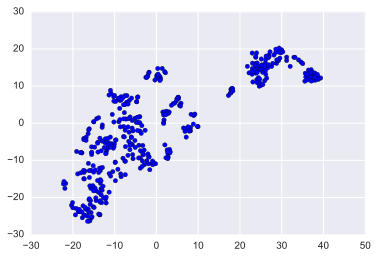

In [20]:
# Lesson 8. 
# Task1. Boston House Prices dataset use and scaling data.
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.datasets import load_boston
boston = load_boston()
target = boston.target
feature_names = boston.feature_names
data = boston.data

X = pd.DataFrame(data, columns = feature_names)
X.head()

Y = pd.DataFrame(target, columns = ['price'])
Y.head()

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

X_train.describe()

# Scale data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
 
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)

# X_train_scaled.describe()

# Build a model 
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2, learning_rate = 250, random_state=42)
X_train_tsne = X_tsne.fit_transform(X_train_scaled)

# Build a plot
plt.style.use('seaborn')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()


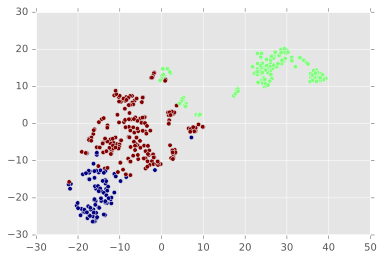

Price Cluster0 = price    27.788372
dtype: float64
Price Cluster1 = price    16.165354
dtype: float64
Price Cluster2 = price    24.958115
dtype: float64
CRIM Cluster0 = 0.07356558139534886
CRIM Cluster1 = 10.797028425196853
CRIM Cluster2 = 0.42166020942408367


In [34]:
# Task2. Clasterization and plot building

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels = kmeans.fit_predict(X_train_scaled)

# Build a plot
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels)
plt.show()

# Mean price
print('Price Cluster0 = {}'.format(Y_train[labels == 0].mean()))
print('Price Cluster1 = {}'.format(Y_train[labels == 1].mean()))
print('Price Cluster2 = {}'.format(Y_train[labels == 2].mean()))

# Mean CRIM
print('CRIM Cluster0 = {}'.format(X_train.loc[labels == 0, 'CRIM'].mean()))
print('CRIM Cluster1 = {}'.format(X_train.loc[labels == 1, 'CRIM'].mean()))
print('CRIM Cluster2 = {}'.format(X_train.loc[labels == 2, 'CRIM'].mean()))


In [35]:
# Task3. Apply KMeans model to X_test

# Apply a model to a scaled test data
labels = kmeans.predict(X_test_scaled)

# Mean price
print('Price Cluster0 = {}'.format(Y_test[labels == 0].mean()))
print('Price Cluster1 = {}'.format(Y_test[labels == 1].mean()))
print('Price Cluster2 = {}'.format(Y_test[labels == 2].mean()))

# Mean CRIM
print('CRIM Cluster0 = {}'.format(X_test.loc[labels == 0, 'CRIM'].mean()))
print('CRIM Cluster1 = {}'.format(X_test.loc[labels == 1, 'CRIM'].mean()))
print('CRIM Cluster2 = {}'.format(X_test.loc[labels == 2, 'CRIM'].mean()))

Price Cluster0 = price    31.35
dtype: float64
Price Cluster1 = price    16.437143
dtype: float64
Price Cluster2 = price    21.860784
dtype: float64
CRIM Cluster0 = 0.062060000000000004
CRIM Cluster1 = 10.165531142857143
CRIM Cluster2 = 0.26607882352941176
